In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

# Catfish Sales Data

In [10]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [11]:
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser).squeeze('columns')

In [12]:
catfish_sales.head()

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
Name: Total, dtype: int64

In [13]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

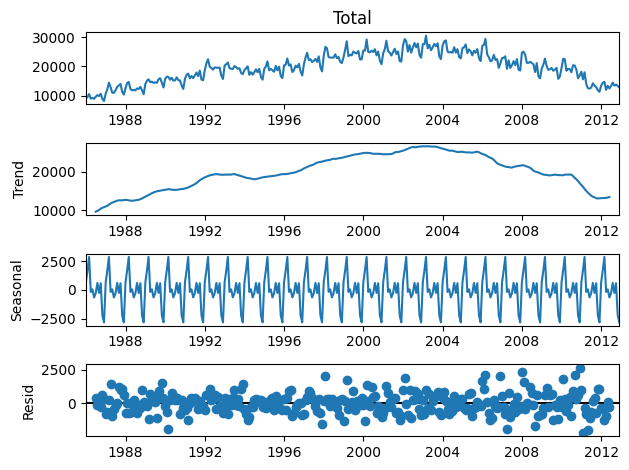

In [14]:
# seasonal decomposition of plot 
nresult = seasonal_decompose(catfish_sales, model='additive', period=12)
nresult.plot()
plt.show()

In [15]:
# take a smaller sample
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

Introduce an Anomaly

In [16]:
#At December 1 1998
lim_catfish_sales[datetime(1998,12,1)] = 10000

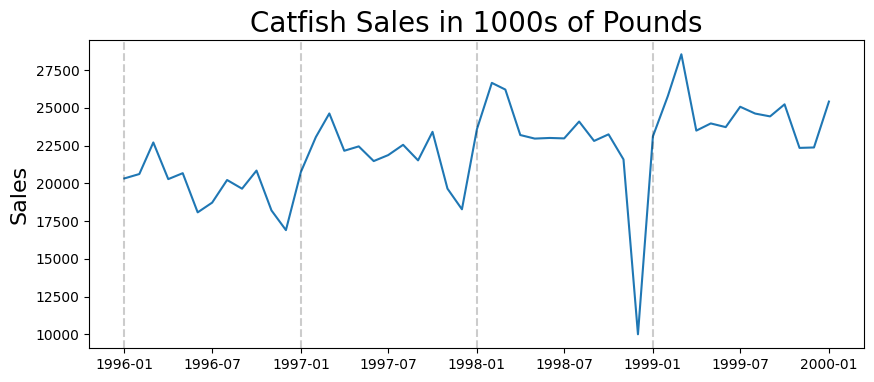

In [17]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Remove the trend

In [18]:
first_diff = lim_catfish_sales.diff()[1:]

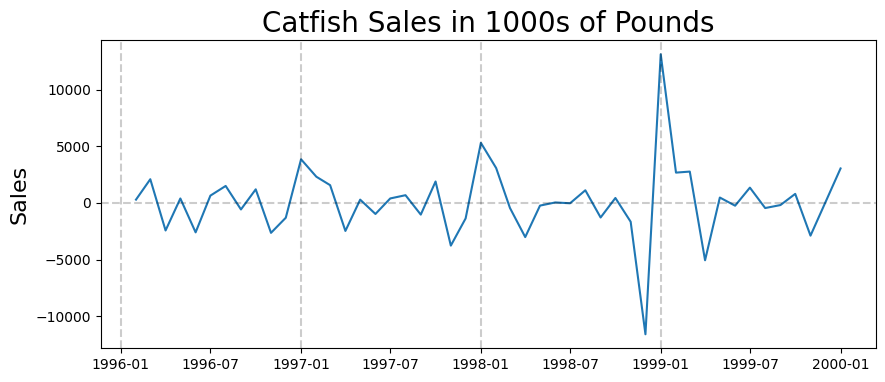

In [19]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

# Get training and testing sets

In [20]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = lim_catfish_sales[train_end + timedelta(days=1):test_end]

# Make Predictions

In [21]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)

In [22]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_catfish_sales[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06637D+01    |proj g|=  2.55355D+00

At iterate    5    f=  9.67102D+00    |proj g|=  1.16467D-01

At iterate   10    f=  9.56669D+00    |proj g|=  1.71041D-02

At iterate   15    f=  9.55134D+00    |proj g|=  9.53057D-04

At iterate   20    f=  9.30731D+00    |proj g|=  1.25661D-02

At iterate   25    f=  9.21700D+00    |proj g|=  3.47397D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00256D+01    |proj g|=  5.95816D-01

At iterate    5    f=  9.20601D+00    |proj g|=  9.12829D-02

At iterate   10    f=  9.15674D+00    |proj g|=  3.57486D-02

At iterate   15    f=  9.13927D+00    |proj g|=  3.16272D-02

At iterate   20    f=  9.13059D+00    |proj g|=  1.17620D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     41      1     0     0   1.176D-02   9.131D+00
  F =   9.1305930989882835     

CONVERG

/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  9.73681D+00    |proj g|=  1.14481D-01

At iterate   10    f=  9.65684D+00    |proj g|=  3.75636D-03

At iterate   15    f=  9.62539D+00    |proj g|=  1.68617D-02

At iterate   20    f=  9.20246D+00    |proj g|=  2.65516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   4.464D-06   9.200D+00
  F =   9.2000887770509561     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [23]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

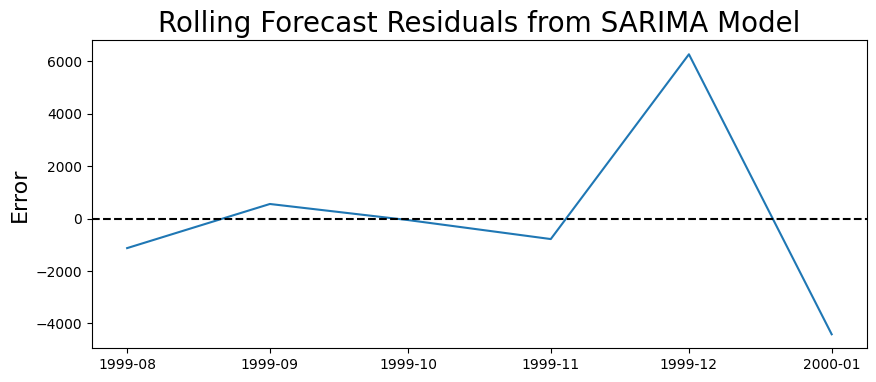

In [24]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

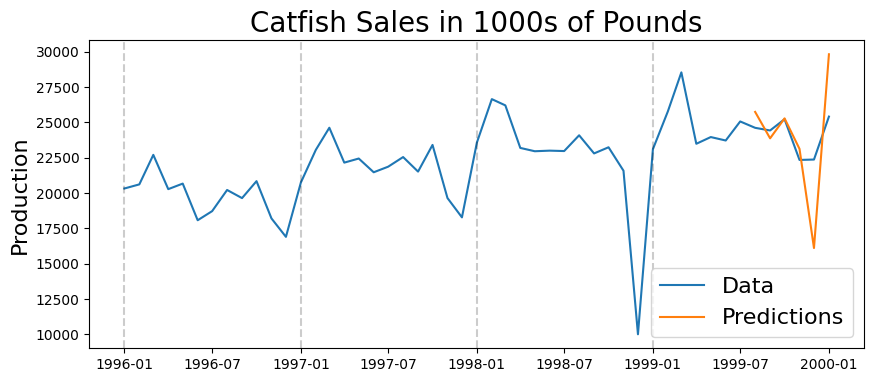

In [25]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [26]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0933


In [27]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 3186.3509612219664


# Detecting the Anomaly

## Attempt 1: Deviation Method

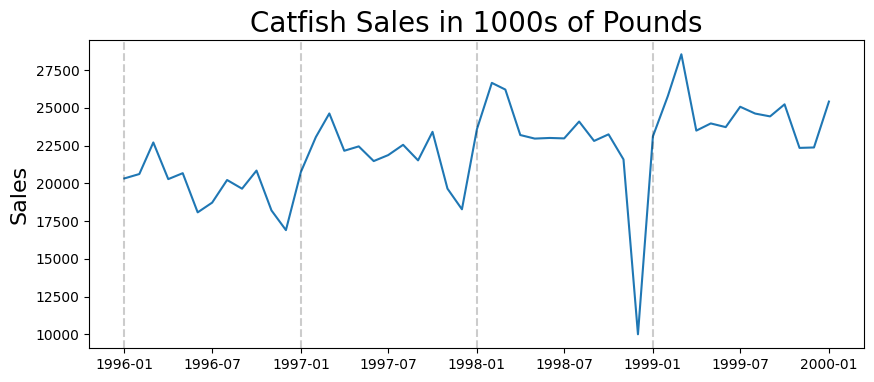

In [28]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [29]:
rolling_deviations = pd.Series(dtype=float, index = lim_catfish_sales.index)

In [30]:
for date in rolling_deviations.index:
    #get the window ending at this data point
    window = lim_catfish_sales.loc[:date]
    
    #get the deviation within this window
    rolling_deviations.loc[date] = window.std()

In [31]:
#get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

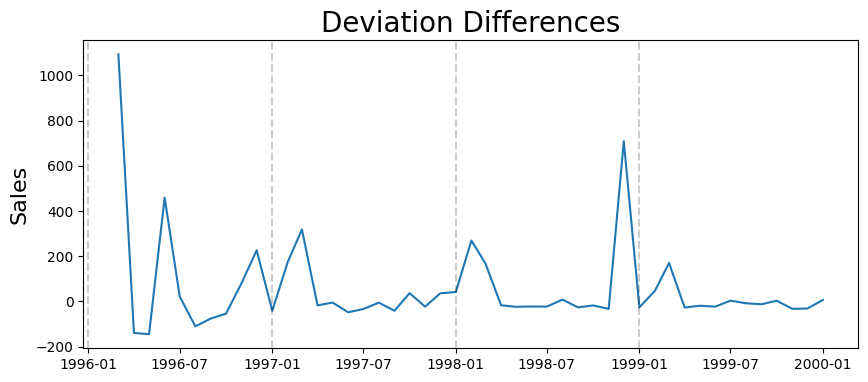

In [32]:
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Attempt 2: Seasonal Method

In [33]:
month_deviations = lim_catfish_sales.groupby(lambda d: d.month).std()

Text(0, 0.5, 'Sales')

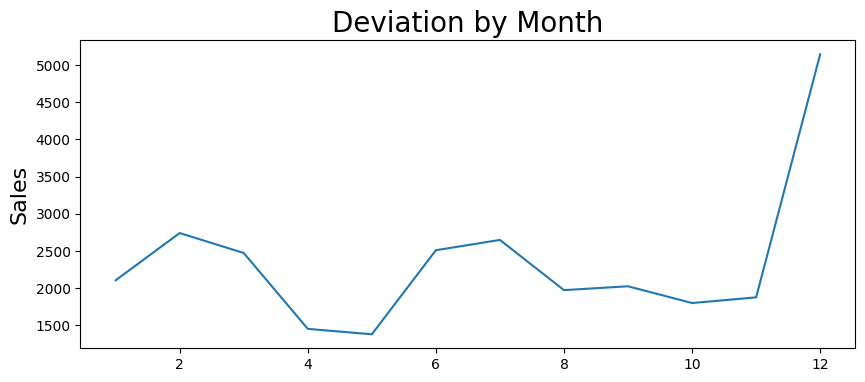

In [34]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

## So, the anomaly occurs in a December

In [35]:
december_data = lim_catfish_sales[lim_catfish_sales.index.month == 12]

In [36]:
december_data

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64

In [37]:
min_dev = 9999999
curr_anomaly = None
for date in december_data.index:
    other_data = december_data[december_data.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date

In [38]:
curr_anomaly

Timestamp('1998-12-01 00:00:00')

# What to do about the anomaly?

## Simple Idea: use mean of other months

In [39]:
adjusted_data = lim_catfish_sales.copy()
adjusted_data.loc[curr_anomaly] = december_data[(december_data.index != curr_anomaly) & (december_data.index < test_data.index[0])].mean()

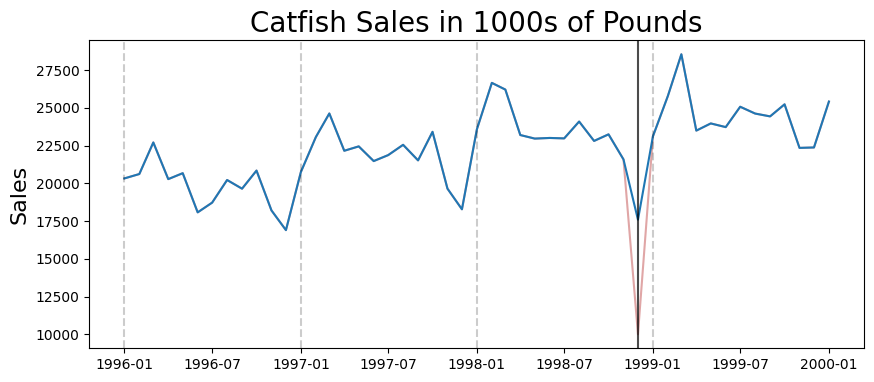

In [40]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales, color='firebrick', alpha=0.4)
plt.plot(adjusted_data)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axvline(curr_anomaly, color='k', alpha=0.7)

# Resulting Predictions

In [41]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = adjusted_data[train_end + timedelta(days=1):test_end]

In [42]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = adjusted_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-inv

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02989D+00    |proj g|=  1.39448D+00

At iterate    5    f=  8.65274D+00    |proj g|=  4.92136D-01

At iterate   10    f=  8.58895D+00    |proj g|=  1.41914D-02

At iterate   15    f=  8.58843D+00    |proj g|=  1.95742D-04

At iterate   20    f=  8.58841D+00    |proj g|=  8.33849D-03

At iterate   25    f=  8.58343D+00    |proj g|=  6.37957D-02

At iterate   30    f=  8.52923D+00    |proj g|=  6.46028D-03

At iterate   35    f=  8.52917D+00    |proj g|=  2.38364D-03

At iterate   40    f=  8.52899D+00    |proj g|=  2.41972D-03

At iterate   45    f=  8.52890D+00    |proj g|=  9.70101D-04

At iterate   50    f=  8.52885D+00    |proj g|=  4.30411D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary startin


At iterate   40    f=  8.52106D+00    |proj g|=  8.48924D-03

At iterate   45    f=  8.52084D+00    |proj g|=  2.17944D-04

At iterate   50    f=  8.52078D+00    |proj g|=  5.06507D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     57      1     0     0   5.065D-04   8.521D+00
  F =   8.5207796680192693     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.06167D+00    |proj g|=  1.55416D+00

At iter

/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.11369D+00    |proj g|=  1.66093D+00

At iterate    5    f=  8.69854D+00    |proj g|=  5.10694D-01

At iterate   10    f=  8.54782D+00    |proj g|=  3.34855D-02

At iterate   15    f=  8.54204D+00    |proj g|=  3.22081D-03

At iterate   20    f=  8.54149D+00    |proj g|=  1.01547D-03

At iterate   25    f=  8.51210D+00    |proj g|=  3.29153D-02

At iterate   30    f=  8.50925D+00    |proj g|=  7.33057D-04

At iterate   35    f=  8.50906D+00    |proj g|=  4.43271D-03

At iterate   40    f=  8.50896D+00    |proj g|=  2.95514D-03

At iterate   45    f=  8.50892D+00    |proj g|=  1.73735D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


In [43]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

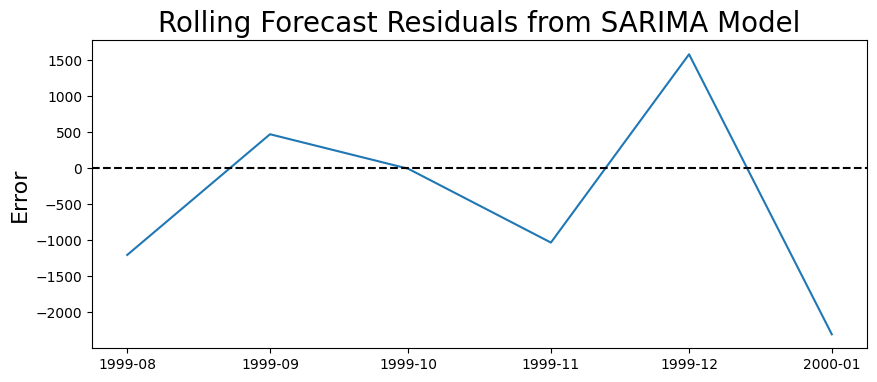

In [44]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

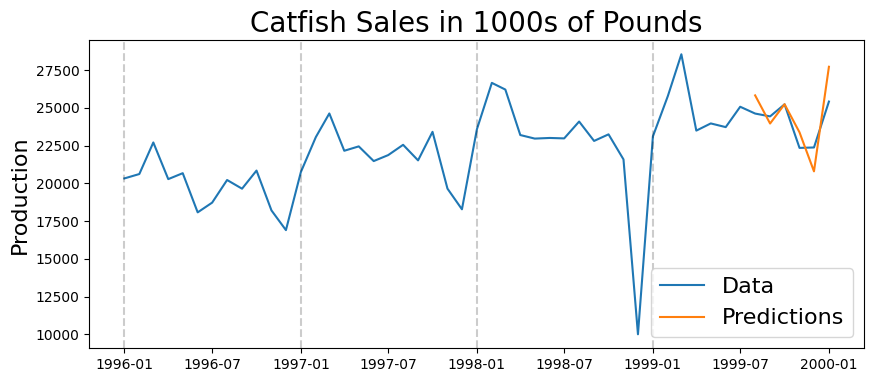

In [45]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [46]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.046


In [47]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1325.9718971433979


In [48]:
# https://www.youtube.com/watch?v=0wfOOl5XtcU

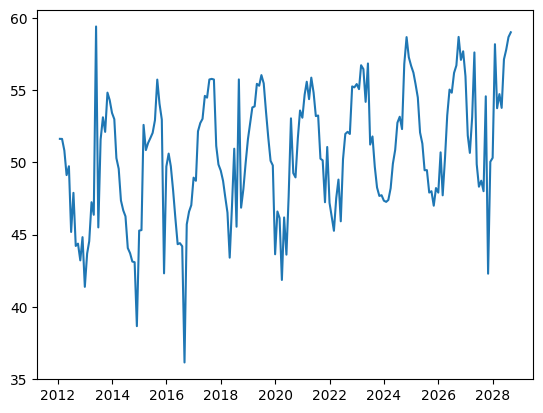

In [49]:
#Here we will just create a random series with seasonality and a slight trend
seasonality = ((np.cos(np.arange(1, 201)*6)*5 + 50))
np.random.seed(1)
trend = np.linspace(-2,3,200)
standard_noise = np.random.normal(0, 1, 200)
true = np.random.choice([0, 1], size = 200, p=[0.85, 0.15])
noise = np.random.normal(0, 5, 200)
y = seasonality + true*noise + trend + standard_noise


times = pd.date_range('2012-01-01', periods=200, freq='M')
df = pd.DataFrame({'value': y}, index = times)


plt.plot(times, y)
plt.show()

In [50]:
# take a smaller sample
start_date = datetime(2012,1,1)
end_date = datetime(2028,1,1)

my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
train_data = df[:-20].copy()

train_end = datetime(2022,1,1)
test_end = datetime(2024,1,1)

rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = train_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred


/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/yorridvangroningen/opt/anaconda3/envs/dev-env/lib/python3.10/site-packages/statsmodels/base/model.py:531: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


LinAlgError: Schur decomposition solver error.

In [ ]:
rolling_residuals = test_data - rolling_predictions
print(rolling_residuals)

In [ ]:
flatten_df = pd.DataFrame(new_dict).to_numpy().flatten()
# flatten_df
value = []
for index in range(len(rolling_predictions)):
    value.append(pd.DataFrame(new_dict[index]).stack().values[1])
rolling_predictions = pd.DataFrame({'value':value}, index = test_data.index)

In [ ]:
rolling_predictions

In [ ]:

plt.figure(figsize=(10,4))

plt.plot(df)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [ ]:
test_data

In [ ]:
df.to_csv('time_series_od')